## WeatherPy API calling weather information for random latitude and longitudes

In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime

In [2]:
#import the requests library
import requests

#import the API key
from config import weather_api_key

In [3]:
#starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [5]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [6]:
#use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

12.18670325085833 -47.74154655632654
7.9008477804674015 -137.20303679685045
-18.242371510704515 -81.74694609697625
1.5175038007539996 -25.06576388016333
30.096076089218172 19.701081489691177
73.2770619787807 -15.57314854237302
-9.914005002433584 -93.88369788006696
62.566955163891265 -112.86641628235695
-82.65112889150767 138.11338053231805
79.08844865562165 -87.24736516892548
62.924290152090975 105.32953434103985
82.48423544821048 42.108194819445174
-14.668084864553748 -51.645818935553564
9.351105268194914 90.94705655157861
15.634840224730112 140.60251335658677
13.814236580125623 -50.0694104253254
36.48722136585863 -110.33405755912734
67.75159255828652 64.40058120718126
72.18390506799014 -86.94215161700718
-43.73645738541991 -29.45766279617999
-24.08190281443632 -169.50034268792928
27.36734883889146 94.81071041027894
50.460209111227925 -165.17886320547439
-73.99494240980522 85.45860190891034
66.17237017271097 -144.2440394797763
44.99494068756118 114.13381585907308
-25.402478704671353 -

-88.1191009753098 52.215101644865314
-44.43751292366942 -142.7341601948012
-1.772794561439838 13.700990090486528
47.44559794814552 -56.60332454155119
-51.18063735915687 166.2436635948556
36.10920047054445 -154.82815555740353
-32.78495327946121 -25.967804567710857
-67.81307399808911 -68.83089557836723
-69.70655482866691 -0.5285941489416643
-41.759613970605464 -117.44995438390599
-36.46354683178576 -111.43308046522353
-89.98010537221172 -151.26814242242452
-30.305907549640793 -18.27167354683354
-16.67435048646699 -32.88543738110755
72.4052622413073 66.82300356106316
59.169116981636336 49.563143802746225
-24.88128229371017 -29.288188122446655
61.59086517766761 81.28716731703258
11.881949477755072 -121.1985682618444
62.152346910893215 -111.85062954490802
-31.32787570584737 -154.57163278706238
-67.5112014162026 104.7824289871977
65.60163621566895 -73.9285405249854
-37.438410162738876 110.00228407648797
50.17507730163857 -84.85047298784457
-57.9624900373784 -178.77101574635208
37.97765906440

In [7]:
from citipy import citipy

In [15]:
#create a list for holding the cities
cities = []
#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique then we will ad it to the cities list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)
#print(cities)

616

In [16]:
#create an empty list to hold weather data
city_data = []

#print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all cities in our list
for i, city in enumerate(cities):
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    #log URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count += 1

#Run an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        #convert date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #append city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    #If an error occurs, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | sinnamary
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | pisco
Processing Record 4 of Set 1 | touros
Processing Record 5 of Set 1 | ajdabiya
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | yerbogachen
Processing Record 12 of Set 1 | ostrovnoy
Processing Record 13 of Set 1 | mozarlandia
Processing Record 14 of Set 1 | port blair
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | iracoubo
Processing Record 17 of Set 1 | winslow
Processing Record 18 of Set 1 | sovetskiy
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | alofi
Processing Record 21 of Set 1 | dibrugarh
Processing Record 22 of Set 1 | bethel
Proces

Processing Record 42 of Set 4 | salalah
Processing Record 43 of Set 4 | pevek
Processing Record 44 of Set 4 | pitimbu
Processing Record 45 of Set 4 | santa luzia
Processing Record 46 of Set 4 | masingbi
Processing Record 47 of Set 4 | plouzane
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | alghero
Processing Record 50 of Set 4 | skjervoy
Processing Record 1 of Set 5 | marcona
City not found. Skipping...
Processing Record 2 of Set 5 | storm lake
Processing Record 3 of Set 5 | solnechnyy
Processing Record 4 of Set 5 | mashpee
Processing Record 5 of Set 5 | bilibino
Processing Record 6 of Set 5 | hilo
Processing Record 7 of Set 5 | oranjemund
Processing Record 8 of Set 5 | bubaque
Processing Record 9 of Set 5 | butaritari
Processing Record 10 of Set 5 | sebastian
Processing Record 11 of Set 5 | namibe
Processing Record 12 of Set 5 | kavieng
Processing Record 13 of Set 5 | meiganga
Processing Record 14 of Set 5 | safford
Processing Record 15 of Set 5 | lorenga

Processing Record 32 of Set 8 | new norfolk
Processing Record 33 of Set 8 | columbus
Processing Record 34 of Set 8 | marang
Processing Record 35 of Set 8 | vasai
Processing Record 36 of Set 8 | itau de minas
Processing Record 37 of Set 8 | walvis bay
Processing Record 38 of Set 8 | laja
Processing Record 39 of Set 8 | jiaocheng
Processing Record 40 of Set 8 | atambua
Processing Record 41 of Set 8 | katangli
Processing Record 42 of Set 8 | vestmannaeyjar
Processing Record 43 of Set 8 | marsa matruh
Processing Record 44 of Set 8 | moanda
Processing Record 45 of Set 8 | miquelon
Processing Record 46 of Set 8 | sao joao da barra
Processing Record 47 of Set 8 | belmonte
Processing Record 48 of Set 8 | yurya
City not found. Skipping...
Processing Record 49 of Set 8 | vila velha
Processing Record 50 of Set 8 | kargasok
Processing Record 1 of Set 9 | avera
Processing Record 2 of Set 9 | hornepayne
Processing Record 3 of Set 9 | montrose
Processing Record 4 of Set 9 | qasigiannguit
Processing R

Processing Record 18 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 19 of Set 12 | rumford
Processing Record 20 of Set 12 | cairns
Processing Record 21 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 22 of Set 12 | kapoeta
Processing Record 23 of Set 12 | tual
Processing Record 24 of Set 12 | doka
Processing Record 25 of Set 12 | sladkovo
Processing Record 26 of Set 12 | floro
Processing Record 27 of Set 12 | livingstonia
Processing Record 28 of Set 12 | urumqi
Processing Record 29 of Set 12 | santiago del estero
Processing Record 30 of Set 12 | tadine
Processing Record 31 of Set 12 | shache
Processing Record 32 of Set 12 | gimli
Processing Record 33 of Set 12 | berbera
Processing Record 34 of Set 12 | paita
Processing Record 35 of Set 12 | takaka
Processing Record 36 of Set 12 | desna
Processing Record 37 of Set 12 | yongan
Processing Record 38 of Set 12 | bela
Processing Record 39 of Set 12 | mayor pablo lagerenza
Processing Record 40 of Set 12

In [17]:
#Convert the array of dictionaries to the Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sinnamary,5.3833,-52.9500,77.65,89,86,10.63,GF,2022-05-20 20:32:57
1,Atuona,-9.8000,-139.0333,77.38,67,0,9.75,PF,2022-05-20 20:32:57
2,Pisco,-13.7000,-76.2167,71.65,60,0,11.50,PE,2022-05-20 20:32:58
3,Touros,-5.1989,-35.4608,79.18,81,81,7.61,BR,2022-05-20 20:32:58
4,Ajdabiya,30.7554,20.2263,66.22,39,0,13.27,LY,2022-05-20 20:32:59
5,Puerto Ayora,-0.7393,-90.3518,80.56,91,53,1.99,EC,2022-05-20 20:32:59
6,Yellowknife,62.4560,-114.3525,59.56,21,75,9.22,CA,2022-05-20 20:33:00
7,Hobart,-42.8794,147.3294,41.05,92,20,6.91,AU,2022-05-20 20:33:00
8,Qaanaaq,77.4840,-69.3632,17.46,81,16,2.82,GL,2022-05-20 20:33:01
9,Yerbogachen,61.2767,108.0108,45.54,80,100,3.44,RU,2022-05-20 20:33:01


In [18]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plotting Latitude vs. Temperature

In [19]:
# Extract relevant fields from DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
#Import time module
import time
#get today's date in seconds
today = time.strftime("%x")
today

'05/20/22'

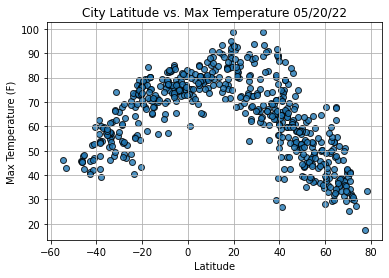

In [23]:
# Import time module
import time

#Build the scatterplot for lat vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

## Plotting Latitude vs Humidity

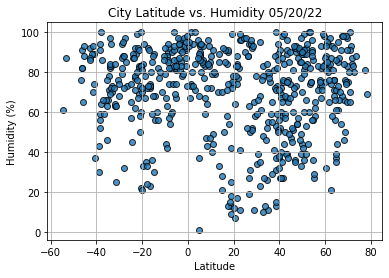

In [24]:
#Build the scatterplot for lat vs humidity
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

## Plotting Latitude vs Cloudiness

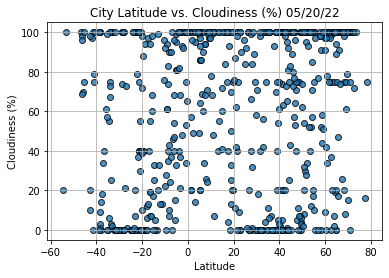

In [25]:
#Build the scatterplot for lat vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

## Plotting Latitude vs Wind Speed

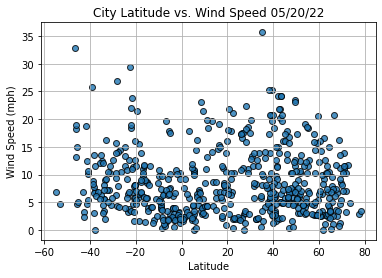

In [26]:
#Build the scatterplot for lat vs max temp
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

## Linear Regression

In [35]:
#import linregress
from scipy.stats import linregress

#create a function to create, perform linear regression on the weather data, and plot a regression line and equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run regression on hemisphere data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #create a scatterplot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
#all latitudes >= 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sinnamary,5.3833,-52.9500,77.65,89,86,10.63,GF,2022-05-20 20:32:57
4,Ajdabiya,30.7554,20.2263,66.22,39,0,13.27,LY,2022-05-20 20:32:59
6,Yellowknife,62.4560,-114.3525,59.56,21,75,9.22,CA,2022-05-20 20:33:00
8,Qaanaaq,77.4840,-69.3632,17.46,81,16,2.82,GL,2022-05-20 20:33:01
9,Yerbogachen,61.2767,108.0108,45.54,80,100,3.44,RU,2022-05-20 20:33:01


In [38]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

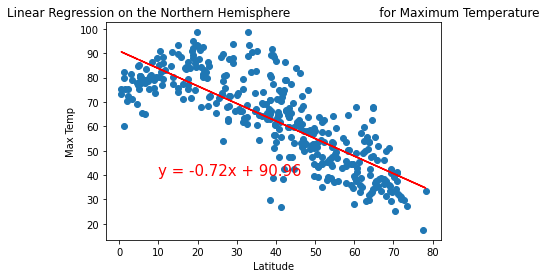

In [39]:
#perform linear regression on northern hemisphere max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (10,40))

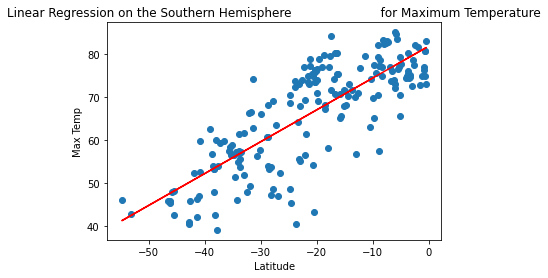

In [40]:
#linear regression on southern hemisphere max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (-50,90))

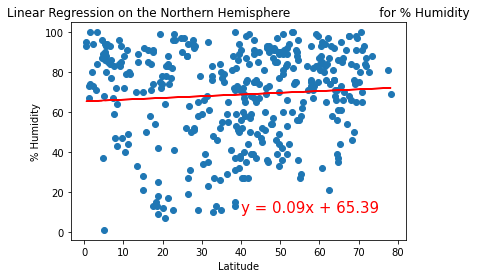

In [41]:
#linear regression on north hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Humidity', '% Humidity', (40,10))

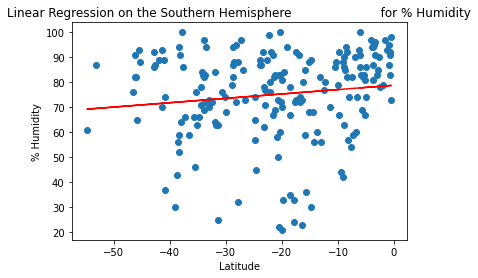

In [42]:
#linear regression on south hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Humidity', '% Humidity', (-50,15))

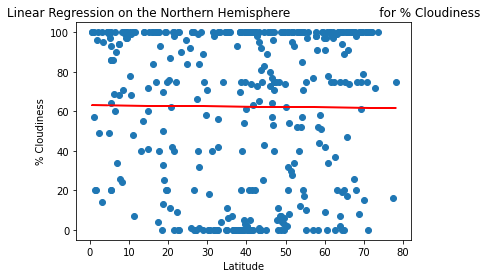

In [43]:
#linear regression on north hemisphere cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Cloudiness', '% Cloudiness', (-5,85))

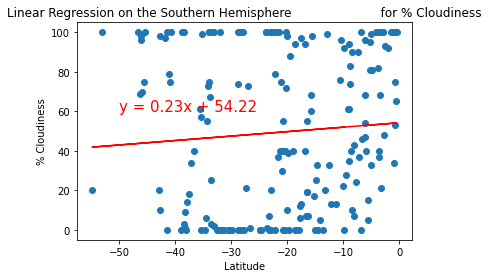

In [44]:
#linear regression on south hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Cloudiness', '% Cloudiness', (-50,60))

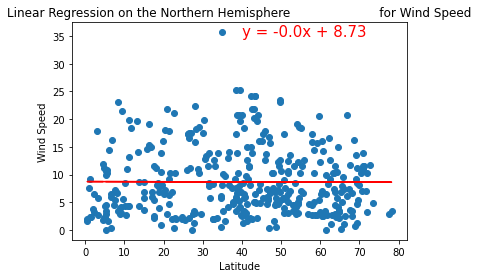

In [45]:
#linear regression on north hemisphere wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Wind Speed', 'Wind Speed', (40,35))

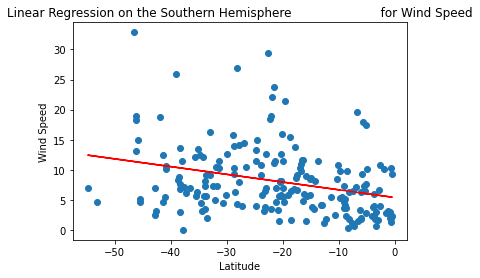

In [46]:
#linear regression on south hemisphere wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#call function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Wind Speed', 'Wind Speed', (-50,35))